In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
from scipy.linalg import expm, eig, logm
from qiskit import QuantumCircuit, QuantumRegister, BasicAer, execute
from operators.triangle_plaquette_hamiltonian import TrianglePlaquetteHamiltonian
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [2]:
SIMULATION = True

In [3]:
# Get on one of the IBM Q machines
from qiskit import IBMQ

if not SIMULATION:
    IBMQ.load_account() # Load account from disk
    IBMQ.providers()    # List all available providers
    provider = IBMQ.get_provider(hub='ibm-q-ornl', project='brookhaven')
    provider.backends()
    backend = provider.get_backend('ibmq_rochester')
    backend

[-6.00000000e+00+0.00000000e+00j -4.10644987e+00+0.00000000e+00j
 -4.00000000e+00+0.00000000e+00j -4.00000000e+00+0.00000000e+00j
 -3.02503016e+00+0.00000000e+00j -3.02503016e+00+0.00000000e+00j
 -3.02503016e+00+0.00000000e+00j -3.02503016e+00+0.00000000e+00j
 -3.02503016e+00+0.00000000e+00j -3.02503016e+00+0.00000000e+00j
 -2.00000000e+00+0.00000000e+00j -2.00000000e+00+0.00000000e+00j
 -2.00000000e+00+0.00000000e+00j -1.20710678e+00+0.00000000e+00j
 -1.20710678e+00+0.00000000e+00j -1.20710678e+00+0.00000000e+00j
 -1.20710678e+00+0.00000000e+00j -1.20710678e+00+0.00000000e+00j
 -1.20710678e+00+0.00000000e+00j -1.00000000e+00+0.00000000e+00j
 -1.00000000e+00+0.00000000e+00j -1.00000000e+00+0.00000000e+00j
 -1.00000000e+00+0.00000000e+00j -1.00000000e+00+0.00000000e+00j
 -1.00000000e+00+0.00000000e+00j -7.65072664e-02+0.00000000e+00j
 -2.57969148e-16+9.83397184e-17j -2.57969148e-16-9.83397184e-17j
 -1.13375413e-16+6.74871644e-17j -1.13375413e-16-6.74871644e-17j
  1.62159872e-17-3.117877

c:\users\kwibu\appdata\local\programs\python\python36\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


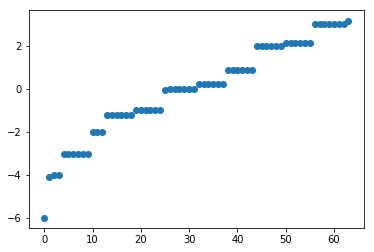

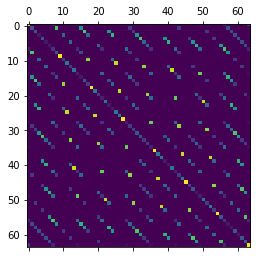

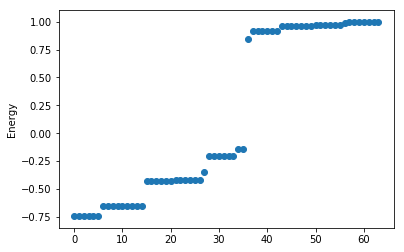

In [4]:
# 2 triangle plaquettes
T = 2
H = TrianglePlaquetteHamiltonian(1, 1, 2)
matH = H.matrix_form()

spectrum, _ = H.eigensystem()
print(np.sort(spectrum))
plt.scatter(range(spectrum.shape[0]), np.sort(spectrum))
plt.show()
exact = expm(-1j*matH*T)
spectrum, _ = eig(exact)
plt.matshow(np.abs(exact))
plt.show()

plt.scatter(range(spectrum.shape[0]), np.sort(spectrum))
plt.ylabel("Energy")
plt.show()

In [5]:
qr = QuantumRegister(6, 'qr')
circ = QuantumCircuit(qr)
circ = H.trotter_circuit_optimized(circ, qr, 0.1, 1)
circ.draw()

»
qr_0: |0>──■─────────────────────────────────────────────────────────────■──»
           │                                                             │  »
qr_1: |0>──┼────■────────────────────────────────────────────────────────┼──»
           │    │                                                        │  »
qr_2: |0>──┼────┼────■───────────────────────────────────────────────────┼──»
         ┌─┴─┐  │    │  ┌──────────┐┌─────────┐┌───────────┐┌─────────┐┌─┴─┐»
qr_3: |0>┤ X ├──┼────┼──┤ U1(0.05) ├┤ Unitary ├┤ U1(-0.05) ├┤ Unitary ├┤ X ├»
         └───┘┌─┴─┐  │  ├──────────┤├─────────┤├───────────┤├─────────┤└───┘»
qr_4: |0>─────┤ X ├──┼──┤ U1(0.05) ├┤ Unitary ├┤ U1(-0.05) ├┤ Unitary ├─────»
              └───┘┌─┴─┐├──────────┤├─────────┤├───────────┤├─────────┤     »
qr_5: |0>──────────┤ X ├┤ U1(0.05) ├┤ Unitary ├┤ U1(-0.05) ├┤ Unitary ├─────»
                   └───┘└──────────┘└─────────┘└───────────┘└─────────┘     »
«                ┌───┐┌──────────┐┌─────────┐ ┌───────────┐ ┌─────────┐ »
«qr_0: ──────────┤ X ├┤ U1(0.05) ├┤ Unitary ├─┤ U1(-0.05) ├─┤ Unitary ├─»
«                └─┬─┘└──┬───┬───┘├─────────┴┐└┬─────────┬┘┌┴─────────┴┐»
«qr_1: ──■─────────┼─────┤ X ├────┤ U1(0.05) ├─┤ Unitary ├─┤ U1(-0.05) ├»
«        │         │     └─┬─┘    └──┬───┬───┘ ├─────────┴┐└┬─────────┬┘»
«qr_2: ──┼────■────┼───────┼─────────┤ X ├─────┤ U1(0.05) ├─┤ Unitary ├─»
«        │    │    │       │         └─┬─┘     └──────────┘ └─────────┘ »
«qr_3: ──┼────┼────■───────┼───────────┼────────────────────────────────»
«      ┌─┴─┐  │            │           │                                »
«qr_4: ┤ X ├──┼────────────■───────────┼────────────────────────────────»
«      └───┘┌─┴─┐                      │                                »
«qr_5: ─────┤ X ├──────────────────────■────────────────────────────────»
«           └───┘                                                       »
«                              ┌───┐          ┌───┐                           »
«qr_0: ────────────────────────┤ X ├──────────┤ X ├────────────────────────■──»
«       ┌─────────┐            └─┬─┘┌───┐     └─┬─┘┌───┐                   │  »
«qr_1: ─┤ Unitary ├──────────────┼──┤ X ├───────┼──┤ X ├───────────────────┼──»
«      ┌┴─────────┴┐┌─────────┐  │  └─┬─┘┌───┐  │  └─┬─┘┌───┐              │  »
«qr_2: ┤ U1(-0.05) ├┤ Unitary ├──┼────┼──┤ X ├──┼────┼──┤ X ├──────────────┼──»
«      └───────────┘└─────────┘  │    │  └─┬─┘  │    │  └─┬─┘┌──────────┐┌─┴─┐»
«qr_3: ──────────────────────────■────┼────┼────■────┼────┼──┤ U1(pi/2) ├┤ X ├»
«                                     │    │         │    │  ├──────────┤└───┘»
«qr_4: ───────────────────────────────■────┼─────────■────┼──┤ U1(pi/2) ├─────»
«                                          │              │  ├──────────┤     »
«qr_5: ────────────────────────────────────■──────────────■──┤ U1(pi/2) ├─────»
«                                                            └──────────┘     »
«                                                                             »
«qr_0: ─────────────────────────────■─────────────────────────────────────────»
«                                   │                                         »
«qr_1: ──■──────────────────────────┼────■────────────────────────────────────»
«        │                          │    │                                    »
«qr_2: ──┼────■─────────────────────┼────┼────■───────────────────────────────»
«        │    │  ┌───────────────┐┌─┴─┐  │    │  ┌──────────────┐┌───────────┐»
«qr_3: ──┼────┼──┤ U3(-0.05,0,0) ├┤ X ├──┼────┼──┤ U3(0.05,0,0) ├┤ U1(-pi/2) ├»
«      ┌─┴─┐  │  ├───────────────┤└───┘┌─┴─┐  │  ├──────────────┤├───────────┤»
«qr_4: ┤ X ├──┼──┤ U3(-0.05,0,0) ├─────┤ X ├──┼──┤ U3(0.05,0,0) ├┤ U1(-pi/2) ├»
«      └───┘┌─┴─┐├───────────────┤     └───┘┌─┴─┐├──────────────┤├───────────┤»
«qr_5: ─────┤ X ├┤ U3(-0.05,0,0) ├──────────┤ X ├┤ U3(0.05,0,0) ├┤ U1(-pi/2) ├»
«           └───┘└───────────────┘          └───┘└──────────────┘└───────────┘»
«      ┌───┐        

c:\users\kwibu\appdata\local\programs\python\python36\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


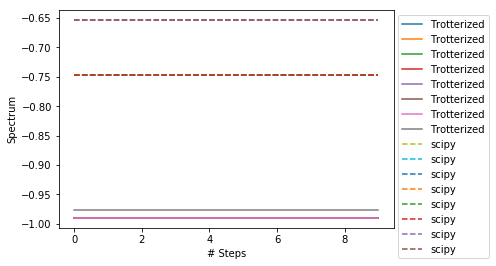

In [6]:
# Initialize a simulator if SIMULATION is True.
if SIMULATION:
    backend = BasicAer.get_backend('unitary_simulator')

# Construct quantum circuits with different number of steps
tr_spectra = []
for n_steps in range(10):
    # Construct Circuit
    qr = QuantumRegister(6, 'qr')
    circ = QuantumCircuit(qr)
    circ = H.trotter_circuit_optimized(circ, qr, 1, 1)
    job = execute(circ, backend)
    eigvals, _ = eig(job.result().get_unitary(circ, decimals=3))
    tr_spectra.append(sorted(eigvals)[:8])
plt.plot(range(10), tr_spectra, label='Trotterized')
plt.plot(range(10), np.tile(np.reshape(sorted(spectrum)[:8], [1, -1]), [10, 1]), linestyle='--', label='scipy')
plt.xlabel("# Steps")
plt.ylabel("Spectrum")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

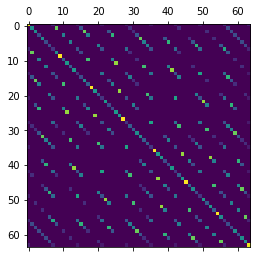

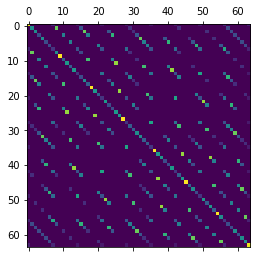

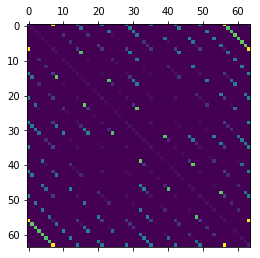

[0.00123019 0.01179876 0.00478662 0.00478662 0.00478662 0.00478662
 0.00478662 0.00478662 0.01179876 0.00060925 0.00048254 0.00015825
 0.00416336 0.00531894 0.00531894 0.00856507 0.00048254 0.00015825
 0.00416336 0.00531894 0.00531894 0.00856507 0.0002202  0.00171794
 0.00171794 0.00043545 0.00438113 0.00890907 0.00048254 0.00015825
 0.00416336 0.00531894 0.00531894 0.00856507 0.0002202  0.00171794
 0.00171794 0.00043545 0.00438113 0.00890907 0.0002202  0.00171794
 0.00171794 0.00043545 0.00438113 0.00890907 0.01165903 0.0007186
 0.00189237 0.00189237 0.00206195 0.00189237 0.00206195 0.00206195
 0.00077277 0.01165903 0.00015825 0.00048254 0.00856507 0.00531894
 0.00531894 0.00416336 0.00012024 0.0012922  0.00052576 0.00034998
 0.0012922  0.00500776 0.00500776 0.00035888 0.00035888 0.0012922
 0.00052576 0.00034998 0.0012922  0.00500776 0.00500776 0.00035888
 0.00035888 0.00554163 0.00213475 0.00064454 0.00042022 0.00050959
 0.00042022 0.00050959 0.00063481 0.00194983 0.00554163 0.004381

In [7]:
T = 1
backend = BasicAer.get_backend('unitary_simulator')
exact = expm(-1j*matH*T)
plt.matshow(np.abs(exact))
plt.show()
qr = QuantumRegister(6, 'qr')
circ = QuantumCircuit(qr)
circ = H.trotter_circuit_optimized(circ, qr, T, 20)
job = execute(circ, backend)
trotterized_mat = job.result().get_unitary(circ, decimals=3)
dif = trotterized_mat - exact
plt.matshow(np.abs(trotterized_mat))
plt.show()
plt.matshow(np.abs(dif))
plt.show()
print(np.abs(dif[np.nonzero(dif)]))
print(trotterized_mat)

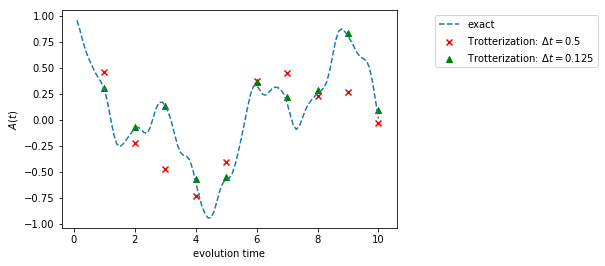

In [11]:
# Initialize a simulator if SIMULATION is True.
if SIMULATION:
    backend = BasicAer.get_backend('unitary_simulator')
    
H = TrianglePlaquetteHamiltonian(0.5, 1, 2)

# Compare exact <0|U|0> with trotterized <0|(Uel Ucoup Upla)^n|0> with 2 steps and 8 steps per T=1
exact_exps = []
tr_exps2 = []
tr_exps8 = []
zerostate = np.zeros([2**6, 1])
zerostate[0, 0] = 1
for t in np.arange(0.1, 10.1, 0.1):
    exact_exps.append(np.real(np.matmul(np.matmul(zerostate.T, expm(-1j*H.matrix_form()*t)), zerostate)[0, 0]))
    
for t in np.arange(1, 11):
    # Construct Circuit with n_steps = 20
    qr = QuantumRegister(6, 'qr')
    circ1 = QuantumCircuit(qr)
    circ1 = H.trotter_circuit_optimized(circ1, qr, t, 2*t)
    job = execute(circ1, backend)
    tr_unitary1 = job.result().get_unitary(circ1, decimals=3)
    tr_exps2.append(np.dot(np.dot(zerostate.T, tr_unitary1), zerostate)[0, 0])
    # Construct Circuit with n_steps = 80
    qr = QuantumRegister(6, 'qr')
    circ2 = QuantumCircuit(qr)
    circ2 = H.trotter_circuit_optimized(circ2, qr, t, 8*t)
    job = execute(circ2, backend)
    tr_unitary2 = job.result().get_unitary(circ2, decimals=3)
    tr_exps8.append(np.dot(np.dot(zerostate.T, tr_unitary2), zerostate)[0, 0])
plt.plot(np.arange(0.1, 10.1, 0.1), exact_exps, label='exact', linestyle='--')
plt.scatter(range(1, 11), tr_exps2, label='Trotterization: $\Delta t=0.5$', c = 'r', marker='x')
plt.scatter(range(1, 11), tr_exps8, label='Trotterization: $\Delta t=0.125$', c='g', marker='^')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xlabel('evolution time')
plt.ylabel('$A(t)$')
plt.show()

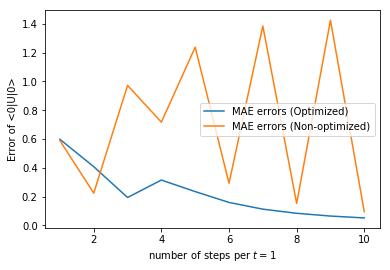

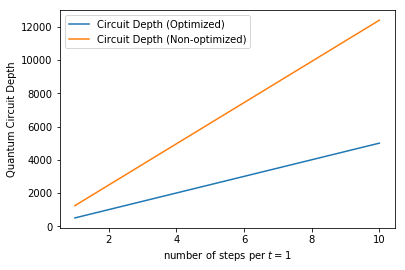

In [18]:
# Initialize a simulator if SIMULATION is True.
if SIMULATION:
    backend = BasicAer.get_backend('unitary_simulator')
    
# Compare exact <0|U|0> with trotterized <0|(Uel Ucoup Upla)^n|0> with 5 steps and 20 steps
exact_exps = []

for t in np.arange(1, 11):
    zerostate = np.zeros([2**6, 1])
    zerostate[-1, 0] = 1
    exact = expm(-1j*H.matrix_form()*t)
    exact_exps.append(np.dot(np.dot(zerostate.T, expm(-1j*H.matrix_form()*t)), zerostate)[0, 0])
exact_exps = np.array(exact_exps)
    
error_list = [] # list of errors for delta t = 1/1, 1/2, ..., 1/10
depth_list = []
error_list_nop = []
depth_list_nop = []
for n_steps in range(1, 11):
    """
    tr_exps = [] # list of expectation values
    for t in np.arange(1, 11):
        # Construct Circuit
        qr = QuantumRegister(6, 'qr')
        circ = QuantumCircuit(qr)
        circ = H.trotter_circuit_optimized(circ, qr, t, n_steps*t)
        job = execute(circ, backend)
        tr_unitary = job.result().get_unitary(circ, decimals=3)
        tr_exps.append(np.dot(np.dot(zerostate.T, tr_unitary), zerostate)[0, 0])
    """
    # Optimized circuit
    qr = QuantumRegister(6, 'qr')
    circ = QuantumCircuit(qr)
    circ = H.trotter_circuit_optimized(circ, qr, 10, n_steps*10)
    job = execute(circ, backend)
    tr_unitary = job.result().get_unitary(circ, decimals=3)
    tr_exp = np.dot(np.dot(zerostate.T, tr_unitary), zerostate)[0, 0]
    error_list.append(np.abs(tr_exp - exact_exps[-1]))
    depth_list.append(circ.depth())
    
    # Non-optimized 
    qr = QuantumRegister(6, 'qr')
    circ = QuantumCircuit(qr)
    circ = H.trotter_circuit(circ, qr, 10, n_steps*10)
    job = execute(circ, backend)
    tr_unitary = job.result().get_unitary(circ, decimals=3)
    tr_exp = np.dot(np.dot(zerostate.T, tr_unitary), zerostate)[0, 0]
    error_list_nop.append(np.abs(tr_exp - exact_exps[-1]))
    depth_list_nop.append(circ.depth())
    
plt.plot(range(1, 11), error_list, label='MAE errors (Optimized)')
plt.plot(range(1, 11), error_list_nop, label='MAE errors (Non-optimized)')
plt.legend()
plt.xlabel('number of steps per $t=1$')
plt.ylabel('Error of <0|U|0>')
plt.show()
plt.plot(range(1, 11), depth_list, label='Circuit Depth (Optimized)')
plt.plot(range(1, 11), depth_list_nop, label='Circuit Depth (Non-optimized)')
plt.legend()
plt.xlabel('number of steps per $t=1$')
plt.ylabel('Quantum Circuit Depth')
plt.show()

In [ ]:
H = TrianglePlaquetteHamiltonian(1, 1, 2)
permH = H.gauge_rotation_basis()
plt.matshow(np.abs(permH))
plt.show()